In [1]:
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"


  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-install-oqjdwnyq/qc-grader_ac6b8809a3cb4303bc1571947ecf48d2
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-install-oqjdwnyq/qc-grader_ac6b8809a3cb4303bc1571947ecf48d2
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 897f4448b14d18b4d0a430f57f11c2dcb6200c20
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.0
Grader version: 0.22.9


In [3]:

token = "opl3nCL0bFDik-1CqTdMZl4V5AVjdbsT-4BfJPln5t_l"

In [4]:
your_api_key = "xi0nZf18SfBZn-P1f124QEWDywbHVDPldD9sjHLkYjNE"
your_crn = "crn:v1:bluemix:public:quantum-computing:us-east:a/28121048c51949f9a93006ccbc7b3faf:edce2be1-5f4f-4532-9d3d-72a7b8c6538d::"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="qgss-2025",
    overwrite=True
)

In [5]:
# Check that the account has been saved properly
service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'xi0nZf18SfBZn-P1f124QEWDywbHVDPldD9sjHLkYjNE',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/28121048c51949f9a93006ccbc7b3faf:edce2be1-5f4f-4532-9d3d-72a7b8c6538d::',
  'verify': True,
  'private_endpoint': False}}

In [6]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

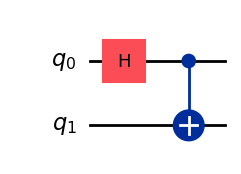

In [7]:
# Create a new circuit with a single qubit
qc = QuantumCircuit(2)
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubit 1
qc.cx(0, 1)
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

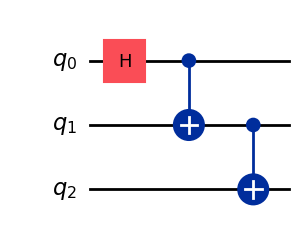

In [8]:
from qiskit import QuantumCircuit
from qiskit.visualization import matplotlib

# Step 1: Create a new quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# Step 2: Apply a Hadamard gate to qubit 0
qc.h(0)

# Step 3: Apply a CNOT gate from qubit 0 to qubit 1
qc.cx(0, 1)

# Step 4: Apply a CNOT gate from qubit 1 to qubit 2
qc.cx(1, 2)

# Step 5: Draw the circuit using matplotlib
qc.draw("mpl")


In [9]:
# Submit your answer using following code
from qc_grader.challenges.qgss_2025 import grade_lab0_ex1



In [10]:
grade_lab0_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


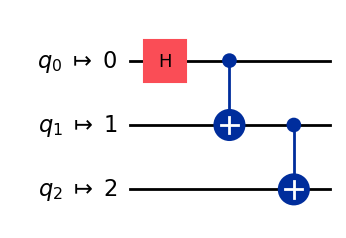

In [11]:
### WRITE YOUR CODE BELOW HERE ###
from qiskit.transpiler import CouplingMap
from qiskit import transpile

# Define the bidirectional coupling map
coupling_map = [[0, 1], [1, 0], [0, 2], [2, 0], [1, 2], [2, 1]]

# Transpile the circuit using the defined coupling map
qc_transpiled = transpile(qc, coupling_map=CouplingMap(coupling_map), optimization_level=1)

### YOUR CODE FINISHES HERE ###

# Draw the transpiled circuit
qc_transpiled.draw("mpl")


In [12]:
grade_lab0_ex2(qc_transpiled)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [13]:
# Add measurement operations
qc.measure_all()

# Set up the backend
backend = AerSimulator()

# Set up the sampler
sampler = Sampler(mode=backend)

# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# Get the results
results_sampler = job.result()

In [14]:
# Set up the Estimator
estimator = Estimator(mode=backend)

# Define some observables
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Submit the circuit to Estimator
pub = (qc, observables)
job = estimator.run(pubs=[pub])

# Get the results
results_estimator = job.result()

  Outcomes : {'000': 503, '111': 521}


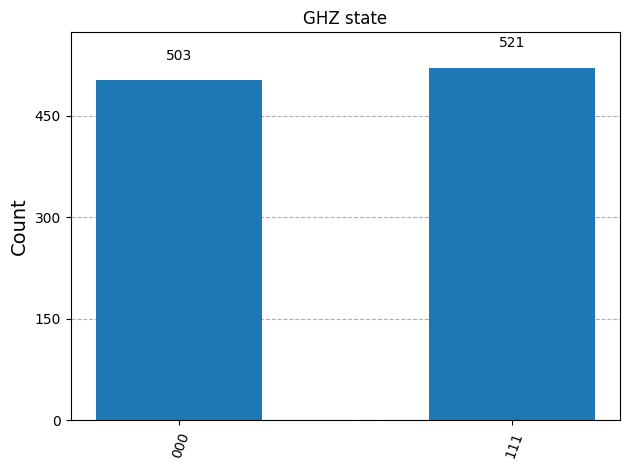

In [15]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Expectation values: [('ZZZ', np.float64(-0.00390625)), ('ZZX', np.float64(-0.0244140625)), ('ZII', np.float64(0.00244140625)), ('XXI', np.float64(0.02734375)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


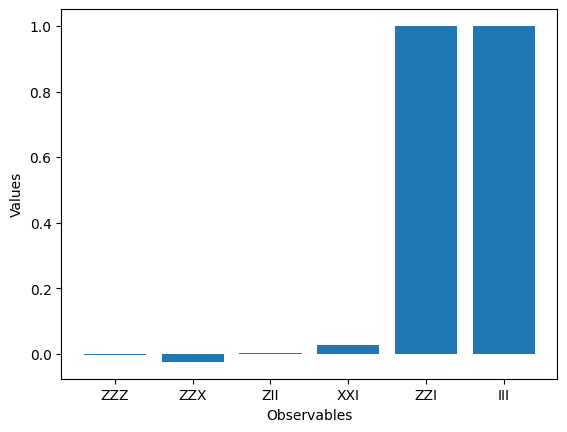

In [16]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# Set up our plot
container = plt.bar(observables_list, exp_values, width=0.8)
# Label each axis
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

In [17]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1215 participants have completed this lab
Lab 1: 0/9 exercises completed (0%)
    ✅ 226 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
